In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [8]:

pip install  keras==2.4.3


  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0


In [10]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\ProgramData\Anaconda3\envs\gpu2\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Abhi\\AppData\\Local\\Temp\\pip-install-ii1r69un\\sklearn_b277b063ad7e4f1d9e6764e0237b93d5\\setup.py'"'"'; __file__='"'"'C:\\Users\\Abhi\\AppData\\Local\\Temp\\pip-install-ii1r69un\\sklearn_b277b063ad7e4f1d9e6764e0237b93d5\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Abhi\AppData\Local\Temp\pip-pip-egg-info-4s5jv0ru'
         cwd: C:\Users\Abhi\AppData\Local\Temp\pip-install-ii1r69un\sklearn_b277b063ad7e4f1d9e6764e0237b93d5\

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=40b0a373d56ad499a1cf259593e27c042494022b7d323f69f0eb556f65a337db
  Stored in directory: c:\users\abhi\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn



    Complete output (18 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip commands.
    
    Here is how to fix this error in the main use cases:
    - use 'pip install scikit-learn' rather than 'pip install sklearn'
    - replace 'sklearn' by 'scikit-learn' in your pip requirements files
      (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
    - if the 'sklearn' package is used by one of your dependencies,
      it would be great if you take some time to track which package uses
      'sklearn' instead of 'scikit-learn' and report it to their issue tracker
    - as a last resort, set the environment variable
      SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
    
    More information is available at
    https://github.com/scikit-learn/sklearn-pypi-package
    
    If the previous advice does not cover your use case, feel free to report it at
    https://github.com/scikit-learn/sklearn-pyp

In [12]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

In [13]:
# Add an additional column, mapping to the type
df = pd.read_csv(r'C:/dr_final/train.csv')


diagnosis_dict_binary = {
    0: 'No_DR',
    1: 'DR',
    2: 'DR',
    3: 'DR',
    4: 'DR'
}

diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df['binary_type'] =  df['diagnosis'].map(diagnosis_dict_binary.get)
df['type'] = df['diagnosis'].map(diagnosis_dict.get)
df.head()

,id_code,diagnosis,binary_type,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<AxesSubplot:>

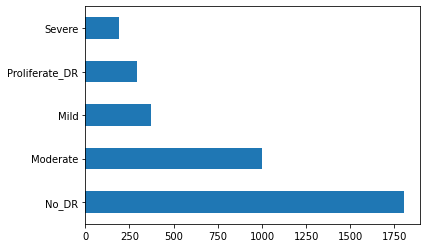

In [14]:
df['type'].value_counts().plot(kind='barh')

<AxesSubplot:>

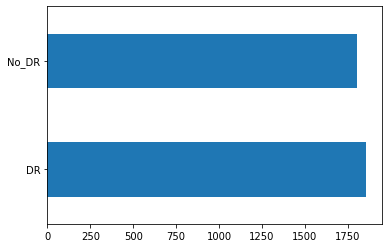

In [14]:
df['binary_type'].value_counts().plot(kind='barh')

In [15]:
# Split into stratified train, val, and test sets
train_intermediate, val = train_test_split(df, test_size = 0.15, stratify = df['type'])
train, test = train_test_split(train_intermediate, test_size = 0.15 / (1 - 0.15), stratify = train_intermediate['type'])

print(train['type'].value_counts(), '\n')
print(test['type'].value_counts(), '\n')
print(val['type'].value_counts(), '\n')


No_DR             1263
Moderate           699
Mild               258
Proliferate_DR     207
Severe             135
Name: type, dtype: int64 

No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: type, dtype: int64 

No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: type, dtype: int64 



In [16]:
# Create working directories for train/val/test
base_dir = ''

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)


In [18]:
# Copy images to respective working directory
src_dir = r'C:/dr_final/gaussian_filtered_images/gaussian_filtered_images'
for index, row in train.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(train_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

for index, row in val.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(val_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)
 
for index, row in test.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(test_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)


In [19]:
# Setting up ImageDataGenerator for train/val/test 

train_path = 'train'
val_path = 'val'
test_path = 'test'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(224,224), shuffle = True)
val_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_path, target_size=(224,224), shuffle = True)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), shuffle = False)


Found 2562 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 550 images belonging to 2 classes.


In [20]:
# Building the model

model = tf.keras.Sequential([
    layers.Conv2D(8, (3,3), padding="valid", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(16, (3,3), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(2, activation = 'softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['acc'])

history = model.fit(train_batches,
                    epochs=30,
                    validation_data=val_batches)

Epoch 1/30
81/81 [==============================] - 60s 742ms/step - loss: 0.4150 - acc: 0.8068 - val_loss: 0.6926 - val_acc: 0.5073
Epoch 2/30
81/81 [==============================] - 54s 671ms/step - loss: 0.2708 - acc: 0.8845 - val_loss: 0.8938 - val_acc: 0.5073
Epoch 3/30
81/81 [==============================] - 64s 786ms/step - loss: 0.2324 - acc: 0.9040 - val_loss: 0.9638 - val_acc: 0.5073
Epoch 4/30
81/81 [==============================] - 59s 725ms/step - loss: 0.2076 - acc: 0.9239 - val_loss: 0.6904 - val_acc: 0.5564
Epoch 5/30
81/81 [==============================] - 54s 671ms/step - loss: 0.1929 - acc: 0.9309 - val_loss: 0.3385 - val_acc: 0.8364
Epoch 6/30
81/81 [==============================] - 54s 671ms/step - loss: 0.1798 - acc: 0.9372 - val_loss: 0.2773 - val_acc: 0.8764
Epoch 7/30
81/81 [==============================] - 54s 668ms/step - loss: 0.1671 - acc: 0.9446 - val_loss: 0.1844 - val_acc: 0.9400
Epoch 8/30
81/81 [==============================] - 54s 662ms/step - 

In [21]:
model.save('64x3-CNN.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: 64x3-CNN.model\assets


In [26]:
# from sklearn.metrics import accuracy_score
# accuracy_score(test_batches,val_batches)
print(val_batches)
print(test_batches)

test_set = dataset(test_df,f'{path}test_images',image_transform = image_transform,train = False )

test_dataloader = DataLoader(test_set, batch_size=32, shuffle=False) #DataLoader for test_set.

In [22]:
image_transform = transforms.Compose([transforms.Resize([512,512]),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) #Transformations to apply to the image.
data_set = dataset(train_df,f'{path}train_images',image_transform=image_transform)

#Split the data_set so that valid_set contains 0.1 samples of the data_set. 
train_set,valid_set = torch.utils.data.random_split(data_set,[3302,360])

Instructions for updating:
Please use Model.evaluate, which supports generators.
18/18 [==============================] - 5s 288ms/step - loss: 0.1652 - acc: 0.9382
Accuracy:  0.9381818175315857


# ****Diabet Retinopathy Detection Section****

In [26]:
pip install --upgrade pip setuptools wheel

  Using cached pip-21.3.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.0.4
    Uninstalling setuptools-58.0.4:
      Successfully uninstalled setuptools-58.0.4
  Attempting uninstall: pip
    Found existing installation: pip 21.2.2
    Uninstalling pip-21.2.2:
      Successfully uninstalled pip-21.2.2
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install opencv-python==4.1.2.30

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


def predict_class(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0
    new_model = tf.keras.models.load_model("64x3-CNN.model")
    predict=new_model.predict(np.array([image]))
    per=np.argmax(predict,axis=1)
    if per==1:
        print('No DR')
    else:
        print('DR')
    

    

DR


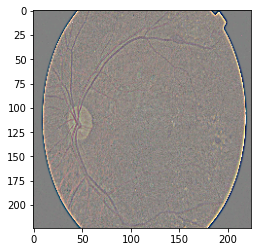

In [2]:
predict_class('C:/dr_final/gaussian_filtered_images/gaussian_filtered_images/Severe/03c85870824c.png')

In [34]:
pip install streamlit

  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached validators-0.20.0.tar.gz (30 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached typing_extensions-4.1.1-py3-none-any.whl (26 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'c:\ProgramData\Anaconda3\envs\gpu2\python.exe' 'c:\ProgramData\Anaconda3\envs\gpu2\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' prepare_metadata_for_build_wheel 'C:\Users\Abhi\AppData\Local\Temp\tmpee7wuofv'
       cwd: C:\Users\Abhi\AppData\Local\Temp\pip-install-oodjlwo1\pywinpty_6451f62e792f4403a6b23e86b84f7c6e
  Complete output (6 lines):
  Checking for Rust toolchain....
  
  Cargo, the Rust package manager, is not installed or is not on PATH.
  This package requires Rust and Cargo to compile extensions. Install it through
  the system's package manager or via https://rustup.rs/
  
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'c:\ProgramData\Anaconda3\envs\gpu2\python.exe' 'c:\ProgramData\Anaconda3\envs\gpu2\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' prepare_metadata_for_build_wheel 'C:\Users\Abhi\AppData\Local\Temp\tmpwr2

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
  Creat

In [6]:
model = tf.keras.models.load_model('64x3-CNN.model')

In [5]:
import streamlit as st
st.write("""
         # DR Prediction
         """
         )
st.write("This is a simple image classification web app to predict dr")
file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

2023-06-05 02:18:32.374 
  command:

    streamlit run c:\ProgramData\Anaconda3\envs\gpu2\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [7]:
import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):
    
        size = (150,150)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img_resize[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, model)
    
    if np.argmax(prediction) == 0:
        st.write("NO DR!")
    elif np.argmax(prediction) == 1:
        st.write("DR Detected")
    else:
        st.write("NONE")
    
    st.write(prediction)